importo librerias

In [13]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import uniform_filter1d
from scipy.signal import medfilt
import os
import glob
import pandas as pd

creando un grafico de señal de audio con **[LIBROSA](https://librosa.org/doc/latest/generated/librosa.load.html)**

In [15]:
audio_path = '../databases_morsecode/arrl-org/arrl-2013/2013-15/130109_15WPM.mp3'

wave_type, sample_rate = librosa.load(audio_path)

duration = len(wave_type) / sample_rate

time = np.linspace(0, duration, num=len(wave_type))


In [38]:

(time.shape)

(8978112,)

- graficando

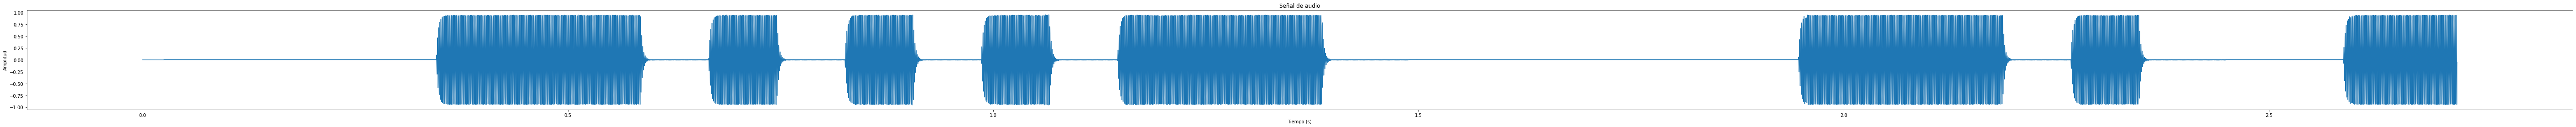

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 4))
plt.plot(time[:60000], wave_type[:60000])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de audio')
plt.show()

### normalizando datos

In [39]:
import numpy as np

normalized_data = (time - np.min(time)) / (np.max(time) - np.min(time))

print(normalized_data.min())

0.0


- grafico de toda la muestra con datos normalizados

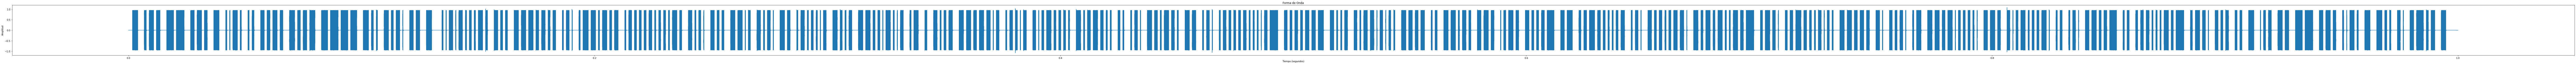

In [40]:
plt.figure(figsize=(200, 4))
plt.plot(normalized_data, wave_type)
plt.title('Forma de Onda')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.show()

- Encontrar la energia de la señal

In [40]:

interval_duration = 0.1 

interval_samples = int(interval_duration * sample_rate)

total_intervals = len(wave_type) // interval_samples

energies = []
for i in range(total_intervals):
    start = i * interval_samples
    end = (i + 1) * interval_samples
    interval_wave_type = wave_type[start:end]
    energy = sum(interval_wave_type**2)
    energies.append(energy)

print(energies)

[0.022419276772496784, 0.029901305850216886, 0.029901306378633308, 502.02483761277426, 978.1722995716228, 845.3399990246053, 304.7775902276451, 457.55104548736375, 694.4608271779473, 172.79051307574076, 659.9169208793936, 493.8132372820028, 976.176436788119, 856.229141186927, 0.03002389117560976, 0.029888378454415943, 0.02990130440957728, 0.029901305792009225, 0.02990130639045674, 487.22751227333237, 978.5216807499777, 859.5445436309733, 289.28992152757104, 469.587972521311, 0.029990713180488737, 88.85701043420607, 977.3960779355373, 978.4905344525898, 280.239859380317, 869.8500022125706, 978.6542996945628, 478.11319168640165, 671.8693641899622, 977.4663870126486, 673.1850944562456, 0.029925462344668464, 0.029899507850132068, 760.6034259642852, 276.2650064556426, 976.8849093956048, 976.6213423331569, 172.3064800694967, 975.5376339450588, 979.2447211658119, 290.7174327541966, 0.029856175180024924, 0.029901305225394026, 0.029901304283157515, 0.02990130441594374, 74.5194018238234, 686.611

- Grafico de energia de señal

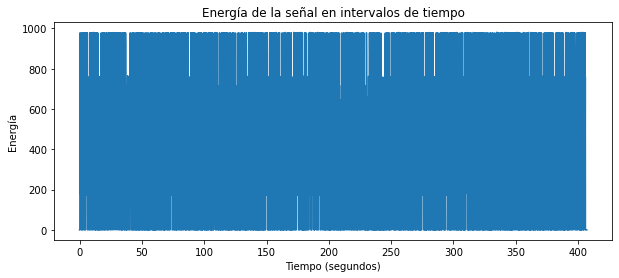

In [63]:
time = np.arange(total_intervals) * interval_duration

plt.figure(figsize=(10, 4))
plt.plot(time, energies)
plt.title('Energía de la señal en intervalos de tiempo')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Energía')
plt.show()

- Convertidor de array(donde estaba la energia de la señal) a binario 


In [64]:

threshold = 0.1 

is_active = [energy > threshold for energy in energies]

on_off = []

for i, active in enumerate(is_active):
    if active:
        on_off.append(1)
    else:
        on_off.append(0)
        
on_off = np.array(on_off)


- Grafico de array en binario

[0 0 0 ... 0 0 0]


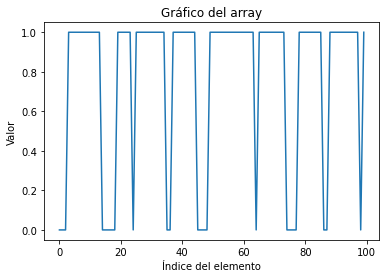

In [70]:
plt.plot(on_off[:100])

print(on_off)

plt.xlabel('Índice del elemento')
plt.ylabel('Valor')
plt.title('Gráfico del array')

plt.show()